# Export read classification from Kraken type reports to redable format
Aims to extract results from kraken type reports, to present and compare results between batches
Sylvain @ GIS / Biopolis / Singapore
<Riondet_Sylvain_from.tp@gis.a-star.edu.sg>

Started on 2019-01-28

todo: bars in pandas tables <br>
http://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

In [2]:
import os
import pandas as pd
import os.path as osp
import ete3.ncbi_taxonomy

In [3]:
ncbi = ete3.ncbi_taxonomy.NCBITaxa()

In [4]:
# folder_isolates = "~/Data/ONT_fastq/"
folder_reports = "/home/ubuntu/Disks/HDD1000/Reports/2019-11-26_100000-SyntReads_20-BacGut"

In [6]:
path_report_full = osp.join(folder_reports, "2015-10bins.full.kraken2.report")

path_report_bins = [osp.join(folder_reports, f) for f in os.listdir(folder_reports) if (".bin-" in f and f.endswith(".report"))]

# file_summary = report_mock.split("__")[2].split(".")[0] + "_summary.pd"  # "Mock_10000-uniform-bacteria_summary.pd"
# report_mock = join(folder_analysis, report_mock)
# # file_summary = join(folder_isolate, file_summary)
# file_summary = join(folder_mock, file_summary)

In [9]:
report_full = pd.read_csv(path_report_full, sep="\t", names=[
    "%_clade_covered", "reads_clade_covered", "reads_direct_taxo", "Rank", "NCBI_Taxo_id", "Scientific_name"])

In [9]:
summuray_df = pd.read_pickle("/home/ubuntu/Data/Segmentation/Test-Data/Synthetic_from_Genomes/2019-12-04_100000-SyntReads_20-BacGut.GT.pd")
summuray_df

,record_id,quality,length,taxon,genome,gen_chr_plas,start,stop,object_id,description,file_path
0,NZ_CP015410.2,1000000,10000,1351,Enterococcus faecalis,complete genome,230000,240000,0,"tax_id=1351,start=230000,Enterococcus : NZ_CP0...",/home/ubuntu/Disks/HDD1000/NCBI/20190704/refse...
1,NZ_CP015410.2,1000000,10000,1351,Enterococcus faecalis,complete genome,1150000,1160000,20,"tax_id=1351,start=1150000,Enterococcus : NZ_CP...",/home/ubuntu/Disks/HDD1000/NCBI/20190704/refse...
2,NZ_CP015410.2,1000000,10000,1351,Enterococcus faecalis,complete genome,290000,300000,21,"tax_id=1351,start=290000,Enterococcus : NZ_CP0...",/home/ubuntu/Disks/HDD1000/NCBI/20190704/refse...
3,NZ_CP015410.2,1000000,10000,1351,Enterococcus faecalis,complete genome,2530000,2540000,22,"tax_id=1351,start=2530000,Enterococcus : NZ_CP...",/home/ubuntu/Disks/HDD1000/NCBI/20190704/refse...
4,NZ_CP015410.2,1000000,10000,1351,Enterococcus faecalis,complete genome,1540000,1550000,23,"tax_id=1351,start=1540000,Enterococcus : NZ_CP...",/home/ubuntu/Disks/HDD1000/NCBI/20190704/refse...
...,...,...,...,...,...,...,...,...,...,...,...
99995,NC_009615.1,1000000,10000,435591,Parabacteroides distasonis ATCC 8503,complete genome,2250000,2260000,99995,"tax_id=435591,start=2250000,Parabacteroides : ...",/home/ubuntu/Disks/HDD1000/NCBI/20190704/refse...
99996,NC_009615.1,1000000,10000,435591,Parabacteroides distasonis ATCC 8503,complete genome,1740000,1750000,99996,"tax_id=435591,start=1740000,Parabacteroides : ...",/home/ubuntu/Disks/HDD1000/NCBI/20190704/refse...
99997,NC_009615.1,1000000,10000,435591,Parabacteroides distasonis ATCC 8503,complete genome,3270000,3280000,99997,"tax_id=435591,start=3270000,Parabacteroides : ...",/home/ubuntu/Disks/HDD1000/NCBI/20190704/refse...
99998,NC_009615.1,1000000,10000,435591,Parabacteroides distasonis ATCC 8503,complete genome,1880000,1890000,99998,"tax_id=435591,start=1880000,Parabacteroides : ...",/home/ubuntu/Disks/HDD1000/NCBI/20190704/refse...


#### Kraken Report format
1. Percentage of fragments covered by the clade rooted at this taxon
2. Number of fragments covered by the clade rooted at this taxon
3. Number of fragments assigned directly to this taxon
4. A rank code, indicating (U)nclassified, (R)oot, (D)omain, (K)ingdom,
   (P)hylum, (C)lass, (O)rder, (F)amily, (G)enus, or (S)pecies.
   Taxa that are not at any of these 10 ranks have a rank code that is
   formed by using the rank code of the closest ancestor rank with
   a number indicating the distance from that rank.  E.g., "G2" is a
   rank code indicating a taxon is between genus and species and the
   grandparent taxon is at the genus rank.
5. NCBI taxonomic ID number
6. Indented scientific name

In [106]:
report_full = report_full[report_full["Rank"]=="S"].sort_values(by=["%_clade_covered"], ascending=False)
report_full.head(10)

,%_clade_covered,reads_clade_covered,reads_direct_taxo,Rank,NCBI_Taxo_id,Scientific_name
378,14.98,14984,2618,S,1280,Staphylococcus aureus
323,14.71,14713,332,S,1351,Enterococcus faecalis
9,14.70,14703,5298,S,562,Escherichia coli
71,14.55,14554,3321,S,573,Klebsiella pneumoniae
214,5.00,5000,656,S,287,Pseudomonas aeruginosa
565,5.00,4997,120,S,817,Bacteroides fragilis
571,5.00,5000,0,S,823,Parabacteroides distasonis
344,4.94,4944,487,S,1590,Lactobacillus plantarum
158,4.91,4914,15,S,584,Proteus mirabilis
488,4.84,4837,600,S,216816,Bifidobacterium longum


In [30]:
reports_bins = []
for rep in path_report_bins:
    tmp_df = pd.read_csv(rep, sep="\t", names=[
        "%_clade_covered", "reads_clade_covered", "reads_direct_taxo", "Rank", "NCBI_Taxo_id", "Scientific_name"])
    reports_bins.append(tmp_df)

In [31]:
report_bins = pd.concat(reports_bins, ignore_index=True)

In [121]:
report_bins[report_bins.Rank == "S"].sort_values("reads_clade_covered", ascending=False).head(15)

,%_clade_covered,reads_clade_covered,reads_direct_taxo,Rank,NCBI_Taxo_id,Scientific_name
2418,21.32,3877,54,S,615,Serratia marcescens
1426,6.87,3824,264,S,1280,Staphylococcus aureus
2368,16.21,2948,322,S,573,Klebsiella pneumoniae
1590,3.86,2149,99,S,1502,Clostridium perfringens
1517,2.27,1265,496,S,33970,Melissococcus plutonius
291,23.90,1194,18,S,584,Proteus mirabilis
2387,5.35,972,68,S,28141,Cronobacter sakazakii
2426,5.06,920,306,S,636,Edwardsiella tarda
1795,1.22,677,0,S,138074,Serratia symbiotica
1594,1.10,613,153,S,1491,Clostridium botulinum


In [69]:
bin_nb = 0
reports_bins[bin_nb][reports_bins[bin_nb].Rank == "S"].sort_values("reads_clade_covered", ascending=False).head(10)

,%_clade_covered,reads_clade_covered,reads_direct_taxo,Rank,NCBI_Taxo_id,Scientific_name
291,23.90,1194,18,S,584,Proteus mirabilis
64,5.85,292,45,S,1351,Enterococcus faecalis
10,4.66,233,125,S,1598,Lactobacillus reuteri
16,4.64,232,0,S,1590,Lactobacillus plantarum
100,2.02,101,0,S,1247,Oenococcus oeni
155,1.64,82,4,S,1280,Staphylococcus aureus
24,1.56,78,33,S,1624,Lactobacillus salivarius
57,1.30,65,0,S,187452,Pediococcus claussenii
59,1.26,63,41,S,1255,Pediococcus pentosaceus
27,1.08,54,27,S,1587,Lactobacillus helveticus


In [68]:
bin_nb = 2
reports_bins[bin_nb][reports_bins[bin_nb].Rank == "S"].sort_values("reads_clade_covered", ascending=False).head(10)

,%_clade_covered,reads_clade_covered,reads_direct_taxo,Rank,NCBI_Taxo_id,Scientific_name
10,6.87,3824,264,S,1280,Staphylococcus aureus
174,3.86,2149,99,S,1502,Clostridium perfringens
101,2.27,1265,496,S,33970,Melissococcus plutonius
379,1.22,677,0,S,138074,Serratia symbiotica
178,1.10,613,153,S,1491,Clostridium botulinum
407,0.79,442,0,S,584,Proteus mirabilis
55,0.64,356,66,S,1282,Staphylococcus epidermidis
383,0.53,293,42,S,9,Buchnera aphidicola
58,0.47,259,259,S,985002,Staphylococcus argenteus
217,0.37,207,142,S,1496,Clostridioides difficile


In [67]:
bin_nb = 3
reports_bins[bin_nb][reports_bins[bin_nb].Rank == "S"].sort_values("reads_clade_covered", ascending=False).head(10)

,%_clade_covered,reads_clade_covered,reads_direct_taxo,Rank,NCBI_Taxo_id,Scientific_name
59,21.32,3877,54,S,615,Serratia marcescens
9,16.21,2948,322,S,573,Klebsiella pneumoniae
28,5.35,972,68,S,28141,Cronobacter sakazakii
67,5.06,920,306,S,636,Edwardsiella tarda
33,2.67,485,0,S,413502,Cronobacter turicensis
94,2.02,368,139,S,287,Pseudomonas aeruginosa
36,1.92,349,0,S,1334193,[Enterobacter] lignolyticus
70,1.55,282,0,S,1263550,Edwardsiella piscicida
126,1.26,229,72,S,316,Pseudomonas stutzeri
108,1.10,200,39,S,303,Pseudomonas putida


In [66]:
bin_nb = 7
reports_bins[bin_nb][reports_bins[bin_nb].Rank == "S"].sort_values("reads_clade_covered", ascending=False).head(10)

,%_clade_covered,reads_clade_covered,reads_direct_taxo,Rank,NCBI_Taxo_id,Scientific_name
10,0.41,51,0,S,1270,Micrococcus luteus
14,0.23,28,0,S,84757,Beutenbergia cavernae
34,0.14,17,0,S,283811,Stackebrandtia nassauensis
57,0.14,17,0,S,73919,Thermaerobacter marianensis
39,0.13,16,0,S,53437,Nocardiopsis alba
49,0.12,15,0,S,49319,Rubrobacter xylanophilus
23,0.08,10,0,S,2066,Kitasatospora setae
26,0.05,6,0,S,1888,Streptomyces albus
87,0.04,5,0,S,80679,Thioflavicoccus mobilis
64,0.03,4,0,S,502394,Deinococcus gobiensis


In [98]:
aggregated_bins = report_bins[report_bins.Rank == "S"].groupby("NCBI_Taxo_id").agg('sum').sort_values("reads_clade_covered", ascending=False)

In [99]:
aggregated_bins["Scientific_name"] = ncbi.translate_to_names(aggregated_bins.index)

In [100]:
aggregated_bins["%_clade_covered"] = aggregated_bins.reads_clade_covered / 100000 * 100

In [120]:
aggregated_bins[["%_clade_covered", "reads_clade_covered","Scientific_name"]].head(15)

,%_clade_covered,reads_clade_covered,Scientific_name
NCBI_Taxo_id,,,
1280,3.906,3906,Staphylococcus aureus
615,3.904,3904,Serratia marcescens
573,3.024,3024,Klebsiella pneumoniae
1502,2.149,2149,Clostridium perfringens
584,1.636,1636,Proteus mirabilis
33970,1.288,1288,Melissococcus plutonius
28141,1.015,1015,Cronobacter sakazakii
636,0.920,920,Edwardsiella tarda
138074,0.679,679,Serratia symbiotica


In [117]:
aggregated_bins["%_clade_covered"].sum()

37.235

In [118]:
report_full[["%_clade_covered", "reads_clade_covered","NCBI_Taxo_id","Scientific_name"]].head(12)

,%_clade_covered,reads_clade_covered,NCBI_Taxo_id,Scientific_name
378,14.98,14984,1280,Staphylococcus aureus
323,14.71,14713,1351,Enterococcus faecalis
9,14.70,14703,562,Escherichia coli
71,14.55,14554,573,Klebsiella pneumoniae
214,5.00,5000,287,Pseudomonas aeruginosa
565,5.00,4997,817,Bacteroides fragilis
571,5.00,5000,823,Parabacteroides distasonis
344,4.94,4944,1590,Lactobacillus plantarum
158,4.91,4914,584,Proteus mirabilis
488,4.84,4837,216816,Bifidobacterium longum


In [112]:
report_full["%_clade_covered"].sum()

98.80000000000003

In [108]:
aggregated_bins.shape

(689, 4)

In [105]:
report_full.shape

(37, 6)

In [38]:
bins_summed = report_bins[report_bins.Rank == "S"].groupby("NCBI_Taxo_id").sum().reset_index()

In [42]:
bins_summed.sort_values("reads_clade_covered", ascending=False, inplace=True)

In [47]:
bins_summed["reads_clade_covered"].sum()

37235

In [48]:
bins_summed["%_clade_covered"] = bins_summed["reads_clade_covered"] / 100000

In [49]:
bins_summed

,NCBI_Taxo_id,%_clade_covered,reads_clade_covered,reads_direct_taxo
140,1280,0.03906,3906,268
67,615,0.03904,3904,54
62,573,0.03024,3024,342
174,1502,0.02149,2149,99
64,584,0.01636,1636,18
...,...,...,...,...
383,73141,0.00001,1,0
391,76860,0.00001,1,0
597,443143,0.00001,1,1
405,83455,0.00001,1,0


In [ ]:
# Fill the report with the ground truth from the summary file
report_df["Ground_truth"] = 0
true_species = summuray_df["species"].tolist()

# need to split the name to find similarities (different writing style :/ )
for i in range(len(report_df)):
    species_string = report_df["Scientific_name"].loc[i]
    species_name = ''.join(e for e in species_string if e.isalnum() or e==" ").split()  # removes special characters
    species_name += ["#don't find me"]   # stupid thing to ensure at least 2 elements
    for single_true_species in true_species:
        if species_name[0] in single_true_species and species_name[1] in single_true_species:  
            # assume a species is defined by 2 words
            report_df.loc[i, "Ground_truth"] = \
                summuray_df[summuray_df["species"]==single_true_species]["requested"].values[0]

In [141]:
report_df = report_df.reindex(columns=['%_clade_covered', 'Ground_truth', 'reads_clade_covered', 
                           'reads_direct_taxo', 'Rank', 'NCBI_Taxo_id', 'Scientific_name'], copy=False)

In [142]:
report_df.sort_values(by=["reads_clade_covered"], ascending=False, inplace=True)

In [143]:
report_df.sort_values(by=["reads_clade_covered"], ascending=False, inplace=True)

In [144]:
summuray_df

,file_name,species,taxonomy_id,kingdom,nb_of_reads,requested,available,percentage
0,Acinetobacter_baumannii_SRR5891470,Acinetobacter_baumannii,470,Bacteria,24892,833,True,8.33%
1,Bacteroides_caccae_ATCC_43185_SRR5817726,Bacteroides_caccae_ATCC_43185,411901,Bacteria,11435,833,True,8.33%
2,Blautia_hansenii_DSM_20583_SRR5817721,Blautia_hansenii_DSM_20583,537007,Bacteria,19800,833,True,8.33%
3,Borreliella_burgdorferi_SRR5434252,Borreliella_burgdorferi,139,Bacteria,17489,833,True,8.33%
4,Clostridioides_difficile_SRR5457531,Clostridioides_difficile,1496,Bacteria,1648,833,True,8.33%
5,Clostridium_bolteae_ATCC_BAA_SRR5817725,Clostridium_bolteae_ATCC_BAA,411902,Bacteria,24796,833,True,8.33%
6,Escherichia_coli_SRR6118140,Escherichia_coli,562,Bacteria,80276,833,True,8.33%
7,Helcococcus_kunzii_SRR5890147,Helcococcus_kunzii,40091,Bacteria,28880,833,True,8.33%
8,Klebsiella_pneumoniae_SRR6348587,Klebsiella_pneumoniae,573,Bacteria,68719,833,True,8.33%
9,Mesoplasma_chauliocola_SRR5997379,Mesoplasma_chauliocola,216427,Bacteria,13792,833,True,8.33%


In [145]:
report_df[report_df["Rank"] == "S"]

,%_clade_covered,Ground_truth,reads_clade_covered,reads_direct_taxo,Rank,NCBI_Taxo_id,Scientific_name
338,8.37,833,837,501,S,562,Escherichia coli
28,8.30,833,830,743,S,1496,Clostridioides difficile
702,7.90,833,790,790,S,47678,Bacteroides caccae
10,7.85,833,785,785,S,208479,[Clostridium] bolteae
15,7.65,833,765,0,S,1322,Blautia hansenii
229,7.26,833,726,726,S,216427,Mesoplasma chauliocola
230,7.11,833,711,0,S,138853,Mesoplasma lactucae
232,6.24,833,624,573,S,2151,Mesoplasma florum
415,6.19,833,619,498,S,573,Klebsiella pneumoniae
763,6.05,833,605,516,S,139,Borreliella burgdorferi


In [146]:
filtered = report_df[(report_df["Rank"] == "S") & (report_df["%_clade_covered"] > 0.00)]
filtered

,%_clade_covered,Ground_truth,reads_clade_covered,reads_direct_taxo,Rank,NCBI_Taxo_id,Scientific_name
338,8.37,833,837,501,S,562,Escherichia coli
28,8.30,833,830,743,S,1496,Clostridioides difficile
702,7.90,833,790,790,S,47678,Bacteroides caccae
10,7.85,833,785,785,S,208479,[Clostridium] bolteae
15,7.65,833,765,0,S,1322,Blautia hansenii
229,7.26,833,726,726,S,216427,Mesoplasma chauliocola
230,7.11,833,711,0,S,138853,Mesoplasma lactucae
232,6.24,833,624,573,S,2151,Mesoplasma florum
415,6.19,833,619,498,S,573,Klebsiella pneumoniae
763,6.05,833,605,516,S,139,Borreliella burgdorferi


In [147]:
print(f'{filtered.shape[0]} species have been found')

279 species have been found


### Counting correctly classified

In [148]:
report_df["TP"] = report_df[["Ground_truth", "reads_clade_covered"]].min(axis=1)
# report_df[report_df["Rank"] == "S"].head(20)

In [149]:
report_df

,%_clade_covered,Ground_truth,reads_clade_covered,reads_direct_taxo,Rank,NCBI_Taxo_id,Scientific_name,TP
1,91.07,0,9103,8,R,1,root,0
2,90.95,0,9091,21,R1,131567,cellular organisms,0
3,87.49,0,8746,26,D,2,Bacteria,0
4,46.99,0,4697,7,D1,1783272,Terrabacteria group,0
5,25.80,0,2579,15,P,1239,Firmicutes,0
333,24.93,0,2492,3,P,1224,Proteobacteria,0
6,24.49,0,2448,1,C,186801,Clostridia,0
334,24.48,0,2447,8,C,1236,Gammaproteobacteria,0
7,24.47,0,2446,5,O,186802,Clostridiales,0
224,20.91,0,2090,0,P,544448,Tenericutes,0


In [150]:
species_df = report_df[report_df["Rank"] == "S"]

In [151]:
tp = species_df["TP"].sum()
gt = summuray_df["requested"].sum()

In [152]:
print(f"There are {tp} reads correctly assigned, for a ground truth of {gt}, which is {100*tp/gt:.2f}%")

There are 7731 reads correctly assigned, for a ground truth of 9996, which is 77.34%


In [153]:
gt

9996

## Wrongly classified ?

In [154]:
report_df[(report_df["Rank"] == "S") & 
          (report_df["%_clade_covered"] > 0.00) & 
          (report_df["TP"] == 0.00)].sort_values(by=["reads_direct_taxo"], ascending=False)

,%_clade_covered,Ground_truth,reads_clade_covered,reads_direct_taxo,Rank,NCBI_Taxo_id,Scientific_name,TP
854,3.19,0,319,319,S,9606,...,0
512,0.49,0,49,48,S,48296,Acinetobacter pittii,0
514,0.40,0,40,40,S,106654,Acinetobacter nosocomialis,0
515,0.11,0,11,11,S,471,Acinetobacter calcoaceticus,0
42,0.06,0,6,6,S,1491,Clostridium botulinum,0
43,0.05,0,5,5,S,1502,Clostridium perfringens,0
440,0.18,0,18,4,S,28901,Salmonella enterica,0
517,0.04,0,4,4,S,2420305,Acinetobacter sp. FDAARGOS_560,0
433,0.04,0,4,4,S,2026240,Klebsiella quasivariicola,0
776,0.04,0,4,4,S,1674146,Borrelia mayonii,0


## Plots

In [100]:
import matplotlib.pyplot as plt

In [101]:
df_plot = report_df[report_df["Rank"] == "S"][["Scientific_name", "reads_clade_covered", "Ground_truth"]].head(20)

In [102]:
df_plot["Percentage"] = 100*df_plot["reads_clade_covered"] / df_plot["Ground_truth"]

In [103]:
df_plot.sort_values(by=["reads_clade_covered"], ascending=True, inplace=True)

In [104]:
df_plot.plot(kind='barh', x="Scientific_name", y="Percentage", 
             figsize=(8, 6), fontsize=16);

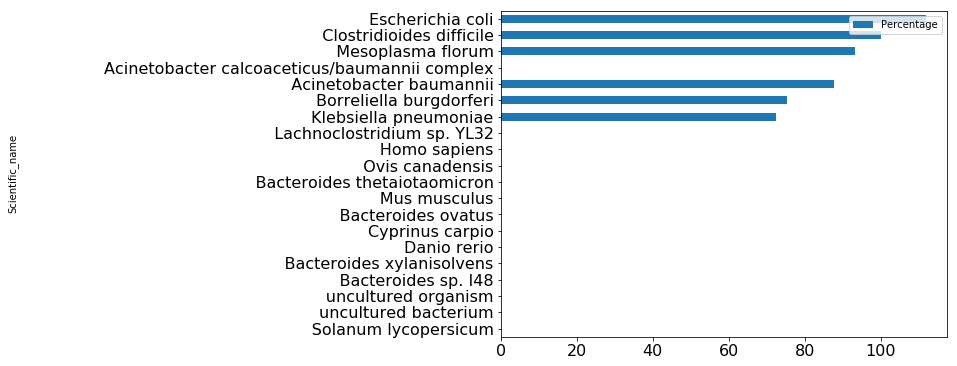

In [105]:
plt.show()

### Low level abundance species

In [106]:
low_lvl_df = report_df[report_df["Rank"]=="S"].copy()

In [107]:
low_lvl_df["wrongs"] = low_lvl_df["reads_clade_covered"] - low_lvl_df["TP"]

In [108]:
low_lvl_df = low_lvl_df[low_lvl_df["wrongs"]!=0].copy()  # remove right lines (wrongs==0)

In [109]:
low_lvl_df.sort_values(by=["wrongs"], inplace=True)

In [110]:
low_lvl_counts = low_lvl_df.wrongs.value_counts(sort=False)

In [112]:
low_lvl_counts

1      539
2      129
3       54
4       43
5       18
6       17
7       11
8        7
9       11
10       7
12       6
13       5
14       2
15       1
16       4
17       3
18       4
20       2
21       1
22       1
24       1
25       1
26       1
27       1
28       2
29       1
30       2
36       1
37       1
38       1
39       1
41       1
47       1
64       1
67       2
68       1
69       1
78       1
97       1
99       1
101      1
120      1
161      1
387      1
761      1
Name: wrongs, dtype: int64

In [113]:
abundance_lvls = 100*low_lvl_counts.index.values / gt

In [114]:
low_abundance = pd.DataFrame({'#Species': low_lvl_counts.values, 'Abundance (%)': abundance_lvls, }, )

In [115]:
low_abundance

,#Species,Abundance (%)
0,539,0.010004
1,129,0.020008
2,54,0.030012
3,43,0.040016
4,18,0.050020
5,17,0.060024
6,11,0.070028
7,7,0.080032
8,11,0.090036
9,7,0.100040


In [116]:
low_abundance.plot(logx=True, logy=True, x='Abundance (%)', y='#Species',
                    figsize=(8, 6), fontsize=12, title="Number of wrongly detected species for a given abundance threshold")

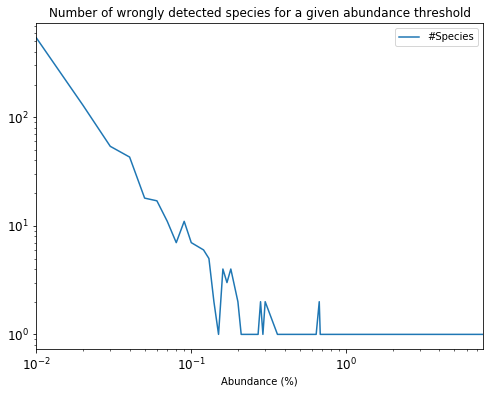

In [117]:
plt.show()

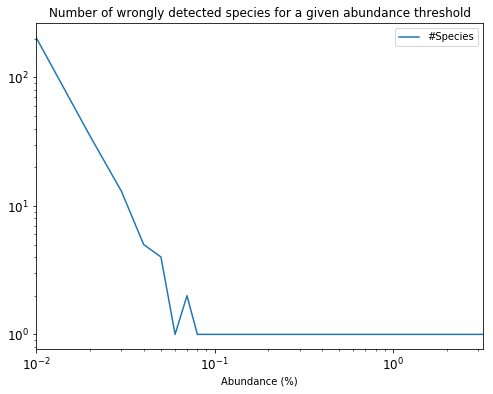

In [62]:
plt.show()

In [ ]:
# Good pandas plots
# http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [ ]:
# summuray_df[['species', 'taxonomy_id', 'kingdom', 'nb_of_reads',
#        'requested', 'available', 'percentage']]